<a href="https://colab.research.google.com/github/yubraaj11/Food-Recommendation-System/blob/master/Food_Recommendation_DataSet_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Paths to Csv Files

In [ ]:
orders_path = '/content/drive/MyDrive/Datasets/orders.csv'
products_path = '/content/drive/MyDrive/Datasets/products.csv'

In [ ]:
import pandas as pd
orders_df = pd.read_csv(orders_path)
products_df = pd.read_csv(products_path)

In [ ]:
orders_df.head()

,order_id,product_list,add_to_cart_order,order_dow,order_hour_of_day,length
0,2,33120,1,5,9,3
1,2,17794,2,5,9,3
2,2,9327,4,5,9,3
3,3,17668,1,5,17,5
4,3,24838,2,5,17,5


In [ ]:
products_df.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages
2,34,Peanut Butter Cereal,121,14,cereal,breakfast
3,45,European Cucumber,83,4,fresh vegetables,produce
4,79,Wild Albacore Tuna No Salt Added,95,15,canned meat seafood,canned goods


In [ ]:
orders_df.rename(columns= {'product_list': 'product_id'}, inplace=True)
orders_df.head()

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length
0,2,33120,1,5,9,3
1,2,17794,2,5,9,3
2,2,9327,4,5,9,3
3,3,17668,1,5,17,5
4,3,24838,2,5,17,5


In [ ]:
df = pd.merge(orders_df,products_df,  on='product_id', how='left')

In [ ]:
df.head()

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,5,9,3,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,17794,2,5,9,3,Carrots,83,4,fresh vegetables,produce
2,2,9327,4,5,9,3,Garlic Powder,104,13,spices seasonings,pantry
3,3,17668,1,5,17,5,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
4,3,24838,2,5,17,5,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs


In [ ]:
df.tail()

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
323700,105628,7131,5,4,16,5,Light Semisoft Cheese,21,16,packaged cheese,dairy eggs
323701,105629,25890,1,0,13,4,Boneless Skinless Chicken Breasts,49,12,packaged poultry,meat seafood
323702,105629,7010,2,0,13,4,Organic White Basmati Rice,63,9,grains rice dried goods,dry goods pasta
323703,105629,3142,3,0,13,4,Organic Short Grain Brown Rice,63,9,grains rice dried goods,dry goods pasta
323704,105629,18670,5,0,13,4,Original Enriched Rice Drink,91,16,soy lactosefree,dairy eggs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

In [ ]:
df['aisle_id'].nunique()

118

In [ ]:
df.shape

(323705, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323705 entries, 0 to 323704
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   order_id           323705 non-null  int64 
 1   product_id         323705 non-null  int64 
 2   add_to_cart_order  323705 non-null  int64 
 3   order_dow          323705 non-null  int64 
 4   order_hour_of_day  323705 non-null  int64 
 5   length             323705 non-null  int64 
 6   product_name       323705 non-null  object
 7   aisle_id           323705 non-null  int64 
 8   department_id      323705 non-null  int64 
 9   aisle              323705 non-null  object
 10  department         323705 non-null  object
dtypes: int64(8), object(3)
memory usage: 29.6+ MB


In [ ]:
df.describe()

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,aisle_id,department_id
count,323705.000000,323705.000000,323705.000000,323705.000000,323705.000000,323705.000000,323705.000000,323705.000000
mean,52958.366998,26057.435501,2.849703,2.731509,13.416836,4.071939,71.842465,9.303193
std,30501.141149,13950.518192,1.392144,2.062346,4.227716,0.968793,37.657558,6.184041
min,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
25%,26558.000000,14242.000000,2.000000,1.000000,10.000000,3.000000,31.000000,4.000000
50%,53076.000000,26131.000000,3.000000,3.000000,13.000000,4.000000,83.000000,7.000000
75%,79391.000000,38400.000000,4.000000,5.000000,16.000000,5.000000,107.000000,16.000000
max,105629.000000,49683.000000,5.000000,6.000000,23.000000,5.000000,134.000000,21.000000


## EDA to gather valuable information from the dataset

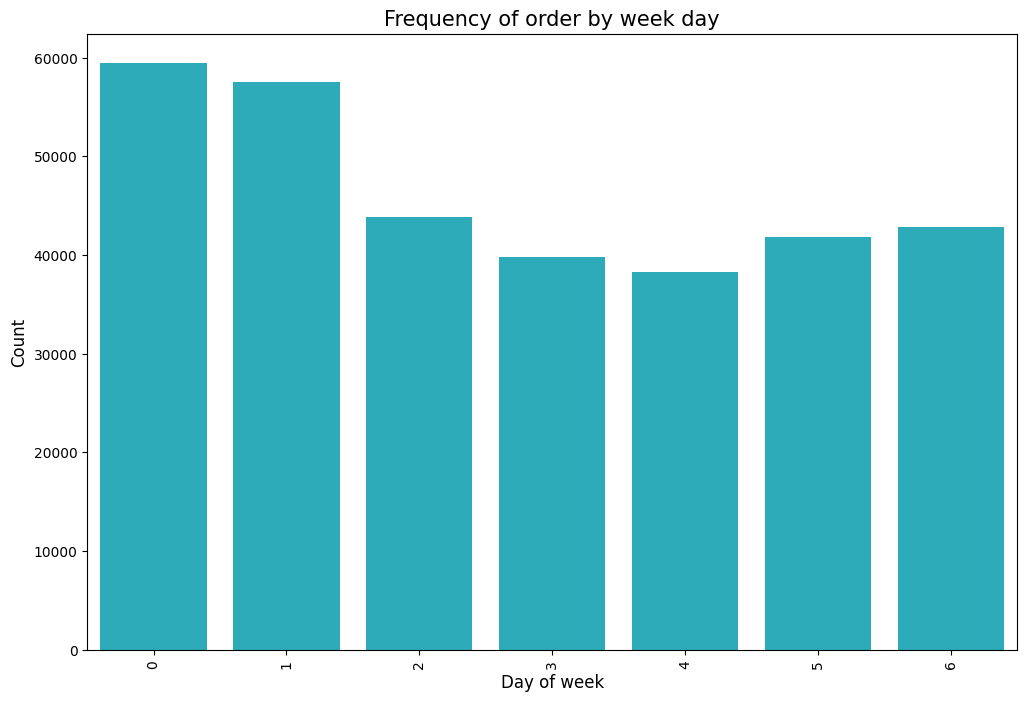

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=df, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

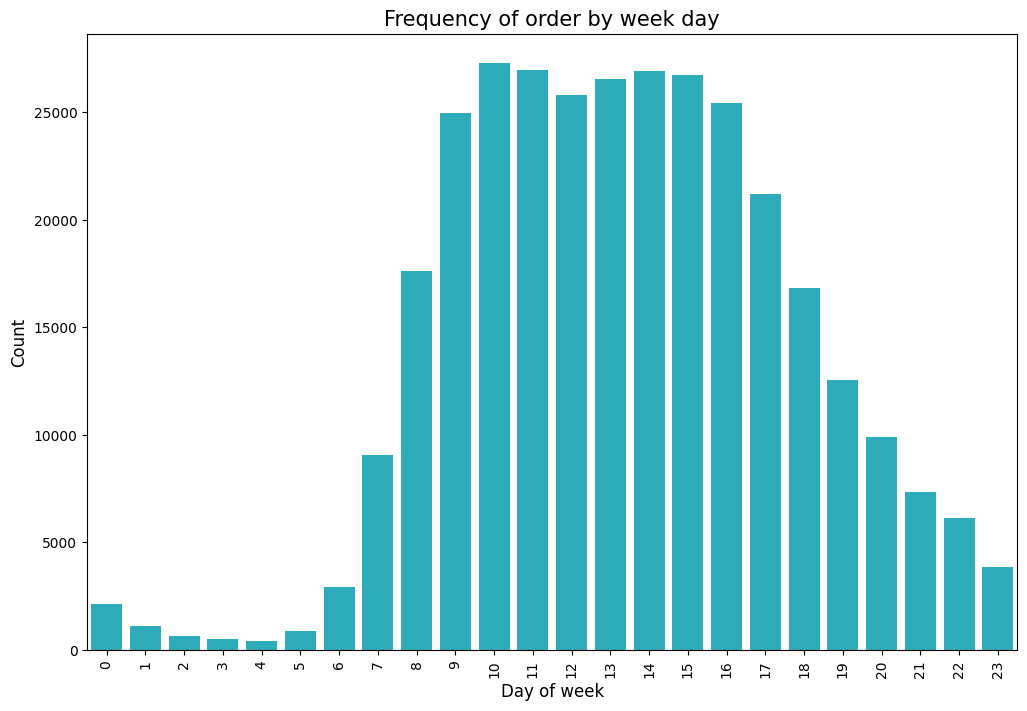

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=df, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

In [ ]:
df['product_name'].value_counts()

Banana                                            5093
Organic Baby Spinach                              4178
Organic Strawberries                              4043
Organic Hass Avocado                              3576
Large Lemon                                       3548
                                                  ... 
Turkey Franks                                       20
Select-a-Size Rolls Paper Towels Tissue             20
Salsa Con Queso Medium                              20
Ultra Soft & Strong® Toilet Paper Double Rolls      20
Cheese & Pepperoni Mini Bagels                      20
Name: product_name, Length: 2965, dtype: int64

In [ ]:
df['department'].value_counts()

produce            121411
dairy eggs          62586
beverages           27116
snacks              23953
frozen              18520
pantry              13334
bakery              10392
deli                 8163
canned goods         7808
meat seafood         6998
breakfast            6203
dry goods pasta      6195
household            4996
babies               2139
international        1340
alcohol              1290
personal care         582
bulk                  338
other                 215
pets                   94
missing                32
Name: department, dtype: int64

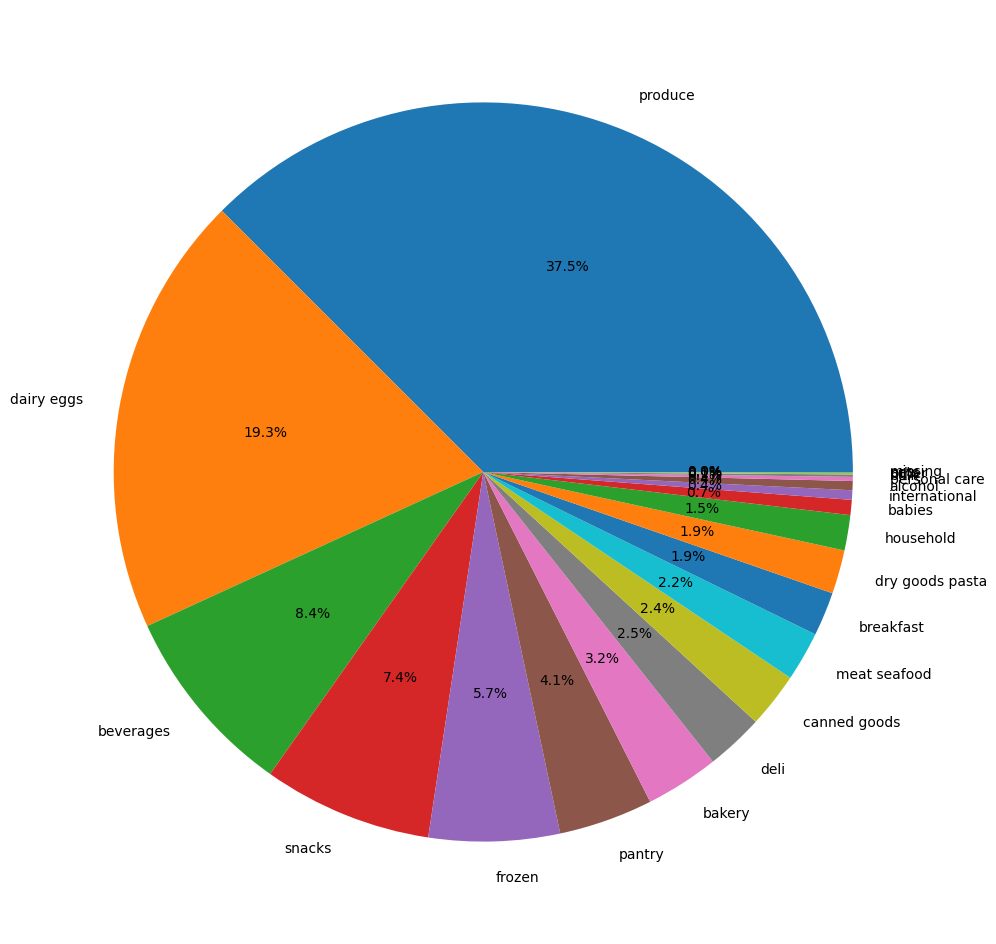

In [ ]:
data1 = pd.DataFrame(df['department'].value_counts().reset_index())
plt.figure(figsize=(12,12))
plt.pie(data=data1, x='department', labels='index', autopct = '%.1f%%')
plt.show()

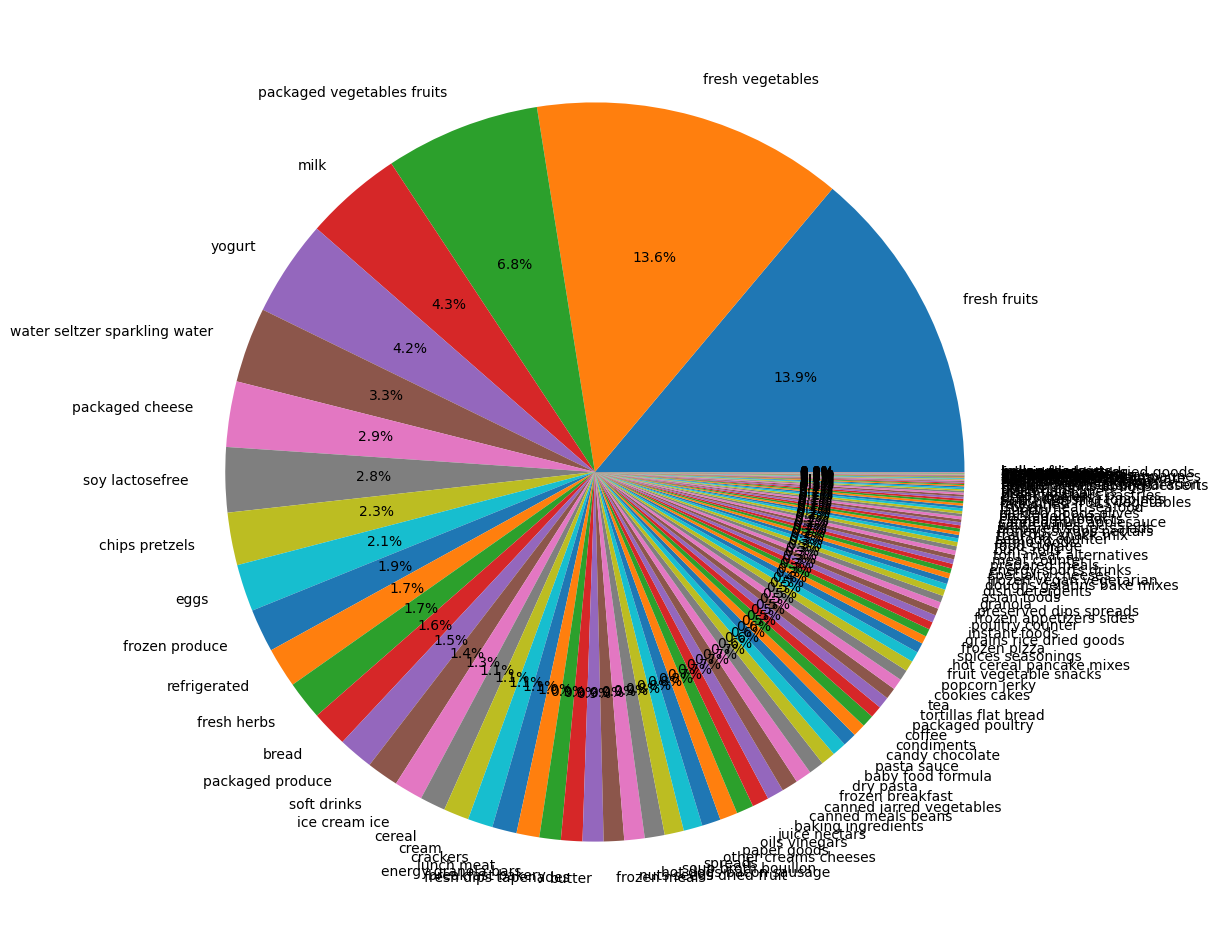

In [ ]:
data1 = pd.DataFrame(df['aisle'].value_counts().reset_index())
plt.figure(figsize=(12,12))
plt.pie(data=data1, x='aisle', labels='index', autopct = '%.1f%%')
plt.show()

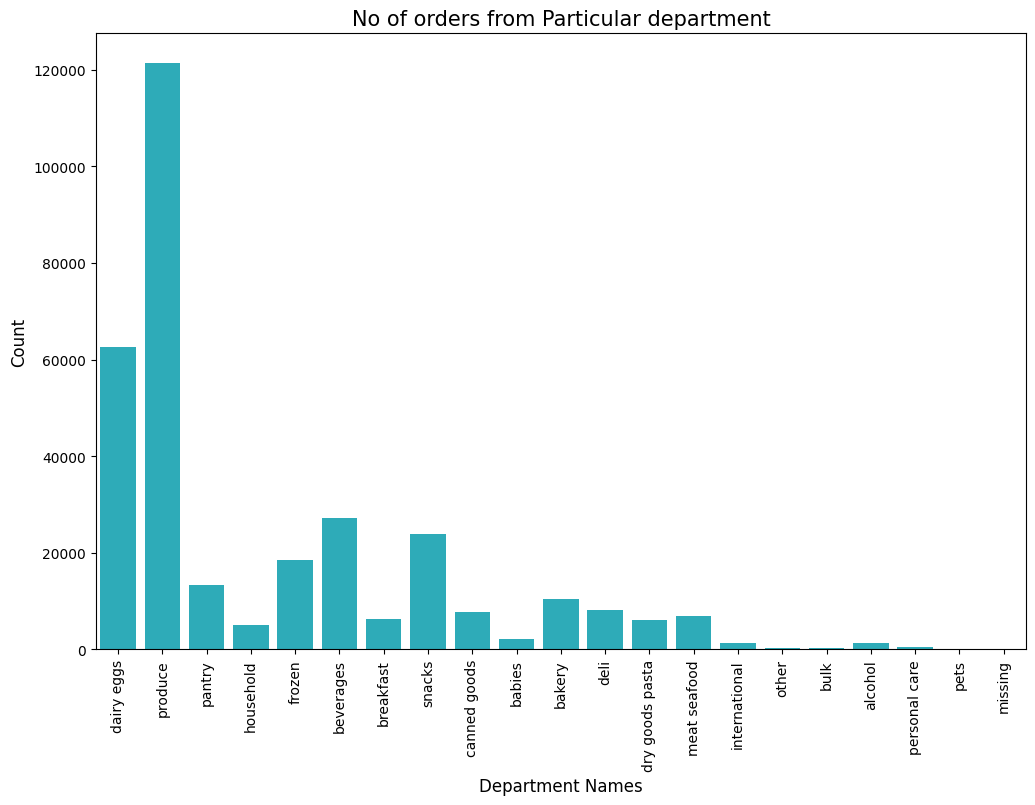

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x="department", data=df, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Department Names', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No of orders from Particular department", fontsize=15)
plt.show()

In [ ]:
df['aisle'].value_counts()

fresh fruits                  44974
fresh vegetables              44076
packaged vegetables fruits    21931
milk                          13833
yogurt                        13620
                              ...  
frozen dessert                   33
missing                          32
cocoa drink mixes                28
bakery desserts                  27
indian foods                     26
Name: aisle, Length: 118, dtype: int64

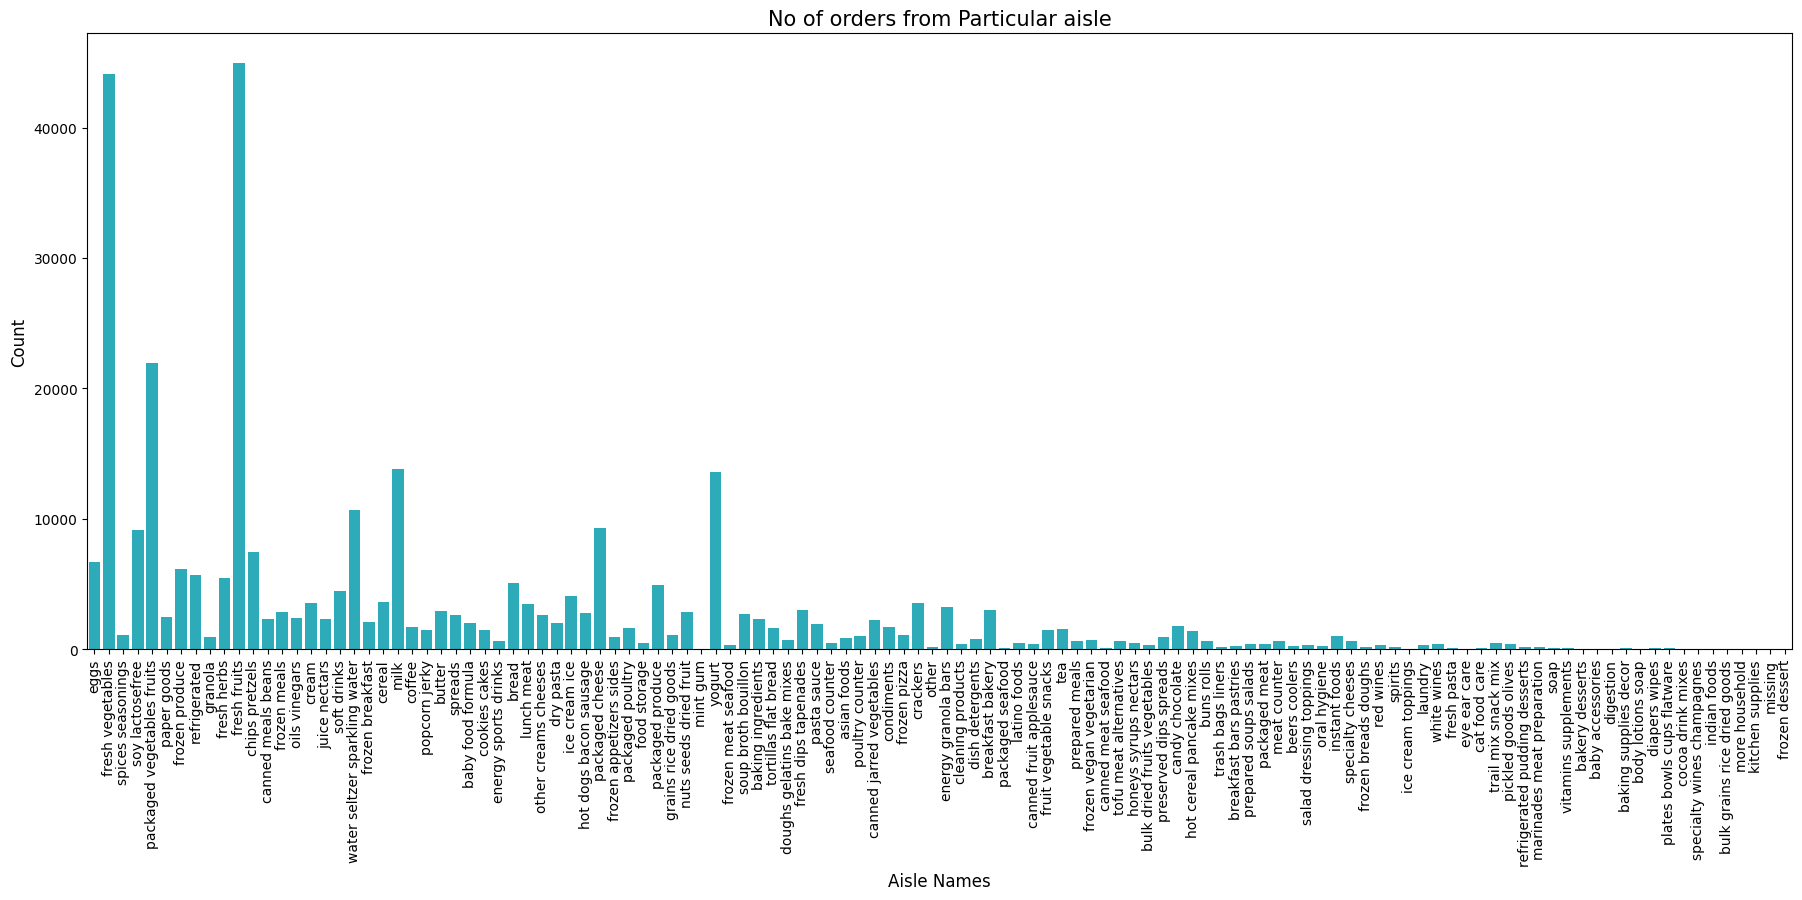

In [ ]:
plt.figure(figsize=(22,8))
sns.countplot(x="aisle", data=df, color=color[9])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Aisle Names', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No of orders from Particular aisle", fontsize=15)
plt.show()

In [ ]:
df

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,5,9,3,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,17794,2,5,9,3,Carrots,83,4,fresh vegetables,produce
2,2,9327,4,5,9,3,Garlic Powder,104,13,spices seasonings,pantry
3,3,17668,1,5,17,5,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
4,3,24838,2,5,17,5,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
323700,105628,7131,5,4,16,5,Light Semisoft Cheese,21,16,packaged cheese,dairy eggs
323701,105629,25890,1,0,13,4,Boneless Skinless Chicken Breasts,49,12,packaged poultry,meat seafood
323702,105629,7010,2,0,13,4,Organic White Basmati Rice,63,9,grains rice dried goods,dry goods pasta
323703,105629,3142,3,0,13,4,Organic Short Grain Brown Rice,63,9,grains rice dried goods,dry goods pasta


## Since the value of product_id is in range of 33000 but unique no of ids are 2965, so encoding them from 1 to 2965

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

encoded_val = lbe.fit_transform(df['product_id'])
encoded_val += 1
df['product_id'] = encoded_val
df

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
0,2,1973,1,5,9,3,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,1050,2,5,9,3,Carrots,83,4,fresh vegetables,produce
2,2,560,4,5,9,3,Garlic Powder,104,13,spices seasonings,pantry
3,3,1045,1,5,17,5,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,soy lactosefree,dairy eggs
4,3,1476,2,5,17,5,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
323700,105628,431,5,4,16,5,Light Semisoft Cheese,21,16,packaged cheese,dairy eggs
323701,105629,1525,1,0,13,4,Boneless Skinless Chicken Breasts,49,12,packaged poultry,meat seafood
323702,105629,419,2,0,13,4,Organic White Basmati Rice,63,9,grains rice dried goods,dry goods pasta
323703,105629,185,3,0,13,4,Organic Short Grain Brown Rice,63,9,grains rice dried goods,dry goods pasta


In [ ]:
df['product_id'].max(), df['product_id'].min()


(2965, 1)

In [ ]:
lbe = LabelEncoder()

encoded_val = lbe.fit_transform(df['aisle_id'])
encoded_val += 1
df['aisle_id'] = encoded_val
df

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
0,2,1973,1,5,9,3,Organic Egg Whites,78,16,eggs,dairy eggs
1,2,1050,2,5,9,3,Carrots,75,4,fresh vegetables,produce
2,2,560,4,5,9,3,Garlic Powder,94,13,spices seasonings,pantry
3,3,1045,1,5,17,5,Unsweetened Chocolate Almond Breeze Almond Milk,83,16,soy lactosefree,dairy eggs
4,3,1476,2,5,17,5,Unsweetened Almondmilk,83,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
323700,105628,431,5,4,16,5,Light Semisoft Cheese,20,16,packaged cheese,dairy eggs
323701,105629,1525,1,0,13,4,Boneless Skinless Chicken Breasts,45,12,packaged poultry,meat seafood
323702,105629,419,2,0,13,4,Organic White Basmati Rice,58,9,grains rice dried goods,dry goods pasta
323703,105629,185,3,0,13,4,Organic Short Grain Brown Rice,58,9,grains rice dried goods,dry goods pasta


In [ ]:
encoded_val = lbe.fit_transform(df['department_id'])
encoded_val += 1
df['department_id'] = encoded_val
df

,order_id,product_id,add_to_cart_order,order_dow,order_hour_of_day,length,product_name,aisle_id,department_id,aisle,department
0,2,1973,1,5,9,3,Organic Egg Whites,78,16,eggs,dairy eggs
1,2,1050,2,5,9,3,Carrots,75,4,fresh vegetables,produce
2,2,560,4,5,9,3,Garlic Powder,94,13,spices seasonings,pantry
3,3,1045,1,5,17,5,Unsweetened Chocolate Almond Breeze Almond Milk,83,16,soy lactosefree,dairy eggs
4,3,1476,2,5,17,5,Unsweetened Almondmilk,83,16,soy lactosefree,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...
323700,105628,431,5,4,16,5,Light Semisoft Cheese,20,16,packaged cheese,dairy eggs
323701,105629,1525,1,0,13,4,Boneless Skinless Chicken Breasts,45,12,packaged poultry,meat seafood
323702,105629,419,2,0,13,4,Organic White Basmati Rice,58,9,grains rice dried goods,dry goods pasta
323703,105629,185,3,0,13,4,Organic Short Grain Brown Rice,58,9,grains rice dried goods,dry goods pasta


In [ ]:
# df[df['product_id'] == 1050]

In [ ]:
df.to_csv('Instacart_original.csv')

## Creating a dataframe consisting only of the required columns `'product_id', 'order_dow', 'order_hour_of_day', 'aisle_id', 'department_id'`

In [ ]:
df1 = df[['order_dow', 'order_hour_of_day','product_id', 'aisle_id', 'department_id']].copy()
df1

,order_dow,order_hour_of_day,product_id,aisle_id,department_id
0,5,9,1973,78,16
1,5,9,1050,75,4
2,5,9,560,94,13
3,5,17,1045,83,16
4,5,17,1476,83,16
...,...,...,...,...,...
323700,4,16,431,20,16
323701,0,13,1525,45,12
323702,0,13,419,58,9
323703,0,13,185,58,9


In [ ]:
df1.sample(n=356)

,order_dow,order_hour_of_day,product_id,aisle_id,department_id
2791,0,23,1044,115,1
221935,2,10,2532,110,4
171213,0,18,2214,107,16
22721,6,19,291,30,4
101541,6,10,2800,34,1
...,...,...,...,...,...
168545,4,11,1479,22,4
203978,5,10,2943,49,16
175184,3,10,73,103,7
186231,1,8,580,29,7


## Creating a dictionary with `product_id` as **key** where `aisle_id` and `department_id` as **values**

In [ ]:
# Creating a dictionary where product_id is key and aisle_id and department_id is values.
import pandas as pd


dictionary = {}

for index, row in df1.iterrows():
    key = row['product_id']
    value1 = row['aisle_id']
    value2 = row['department_id']
    dictionary[key] = [value1, value2]

print(dictionary)
print(len(dictionary))


{1973: [78, 16], 1050: [75, 4], 560: [94, 13], 1045: [83, 16], 1476: [83, 16], 1046: [110, 4], 2787: [75, 4], 1302: [110, 4], 2738: [50, 17], 2221: [75, 4], 2796: [104, 1], 2038: [29, 7], 861: [52, 14], 676: [110, 4], 913: [75, 4], 1872: [15, 4], 197: [75, 4], 1250: [22, 4], 78: [97, 19], 362: [54, 15], 1780: [35, 1], 1855: [18, 13], 1803: [49, 16], 2060: [90, 7], 1527: [97, 19], 14: [70, 7], 2480: [29, 7], 1381: [70, 7], 1981: [103, 7], 12: [48, 1], 2519: [108, 14], 1241: [104, 1], 1655: [76, 16], 1212: [24, 7], 448: [54, 15], 1254: [18, 13], 1171: [103, 7], 1502: [103, 7], 588: [21, 19], 2810: [75, 4], 1714: [104, 1], 478: [33, 16], 444: [80, 13], 1891: [84, 18], 2532: [110, 4], 2494: [75, 4], 2121: [56, 19], 2561: [22, 4], 1995: [59, 7], 1479: [22, 4], 239: [22, 4], 1515: [24, 7], 1717: [75, 4], 1359: [101, 3], 1271: [88, 20], 1435: [76, 16], 481: [22, 4], 1114: [98, 16], 716: [117, 9], 518: [75, 4], 1526: [110, 4], 2416: [34, 1], 2768: [34, 1], 2350: [96, 12], 2248: [20, 16], 2878:

## Adding a target column to the dataframe `df1`

In [ ]:
df1['target'] = None

## Creating a dataframe with positive sampling `target=1` and negative `target=0` sampling

In [ ]:
# creating positive and negative sampling
import random
from tqdm import tqdm

df_preprocessed = pd.DataFrame()

for i in range(0, 7):
    for j in range(0, 24):
        filtered = df1[(df1['order_dow'] == i) & (df1['order_hour_of_day'] == j)]
        no_s = filtered.shape[0]
        filtered['target'] = 1
        df_preprocessed = pd.concat([df_preprocessed, filtered], ignore_index=True, axis=0)
        # print(filtered)

        filtered_keys =  set(filtered['product_id'])
        # print(len(filtered_keys))
        # print(filtered_keys)

        filtered_dict = {key: value for key, value in dictionary.items() if key not in filtered_keys}
        # print(filtered_dict.keys())
        # print(filtered_dict)


        random_pairs = np.random.choice(list(filtered_dict.keys()), no_s, replace=True)
        # print(random_pairs)
        # random_dict = dict(random_pairs)

        # print(random_dict)

        data = [{'product_id': item,'order_dow': i, 'order_hour_of_day':j ,'aisle_id': dictionary[item][0], 'department_id': dictionary[item][1], 'target':0}
                for item in random_pairs]

        neg_df = pd.DataFrame(data)

        df_preprocessed = pd.concat([df_preprocessed, neg_df], ignore_index=True, axis=0)


# print(df_preprocessed)

<ipython-input-35-73aba2cfef44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['target'] = 1
<ipython-input-35-73aba2cfef44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['target'] = 1
<ipython-input-35-73aba2cfef44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

## Preprocessed Data

In [ ]:
df_preprocessed

,order_dow,order_hour_of_day,product_id,aisle_id,department_id,target
0,0,0,577,48,1,1
1,0,0,1671,22,4,1
2,0,0,2880,110,4,1
3,0,0,513,101,3,1
4,0,0,1479,22,4,1
...,...,...,...,...,...,...
647405,6,23,1911,55,17,0
647406,6,23,105,34,1,0
647407,6,23,2029,3,19,0
647408,6,23,2242,29,7,0


## Checking the distribution of positive and negative sampling of target variable

In [ ]:
df_preprocessed['target'].value_counts()

1    323705
0    323705
Name: target, dtype: int64

## Saving the preprocessed data to csv format

In [ ]:
df_preprocessed.to_csv('Preprocessed_instacart_v1.csv')

In [ ]:
import pickle

with open('product_dict_v1.pkl', 'wb') as file:
    pickle.dump(dictionary, file, protocol = pickle.HIGHEST_PROTOCOL)